In [42]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.WPDYT0_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.WPDYT0_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
def preprocessing(img, label):
  img = tf.image.resize(img, (28,28))
  img = tf.cast(img,tf.float32)/255.0
  return img, label

In [20]:
train_ds = ds_train.map(preprocessing).shuffle(10000).batch(32).prefetch(1)
test_ds = ds_test.map(preprocessing).batch(32).prefetch(1)

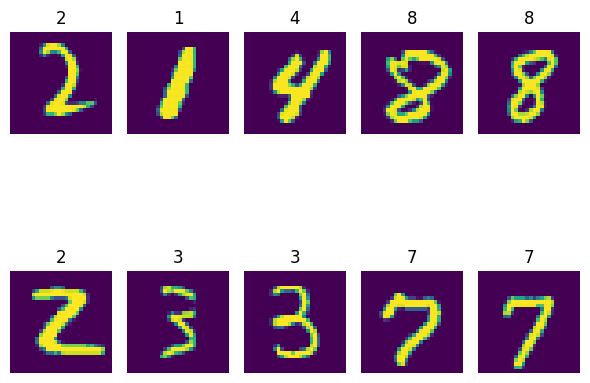

In [55]:
for imgs, labels in train_ds.take(1):
    plt.figure(figsize=(6,6))
    for i in range(10):
        plt.subplot(2,5, i + 1)
        plt.imshow(imgs[i])
        plt.title(labels[i].numpy())
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [35]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,106 (109.79 KB)

 Trainable params: 28,106 (109.79 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8195 - loss: 0.5744 - val_accuracy: 0.9591 - val_loss: 0.1333
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9648 - loss: 0.1109 - val_accuracy: 0.9732 - val_loss: 0.0871
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9765 - loss: 0.0774 - val_accuracy: 0.9774 - val_loss: 0.0727
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9815 - loss: 0.0591 - val_accuracy: 0.9768 - val_loss: 0.0714
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9849 - loss: 0.0491 - val_accuracy: 0.9805 - val_loss: 0.0644


In [ ]:
plt.plot(history.history['accuracy'], label='Entrenamientos')
plt.plot(history.history['val_accuracy'], label='Valoracion')
plt.grid()
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


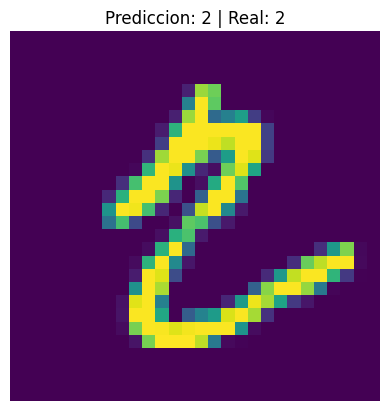

In [59]:
index_data = 21
for img, label in test_ds.take(1):
    pred = model.predict(img)
    plt.imshow(img[index_data])
    plt.title(f"Prediccion: {np.argmax(pred[index_data])} | Real: {label[index_data].numpy()}")
    plt.axis("off")
    plt.show()